In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#### Importing libraries and modules

In [ ]:

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# reading the data in a dataframe df

header_list = ["text","intent","buffer"]
header_list1 = ["buffer","text","intent"]
train = pd.read_csv('/content/drive/My Drive/english_hope_train.csv','\t',header=None,names=header_list)
valid = pd.read_csv("/content/drive/My Drive/english_hope_dev.csv", '\t',header=None,names=header_list)
#train1=pd.read_csv("/content/drive/My Drive/train_10000_dpadded.csv" )

In [ ]:
df_train = pd.DataFrame(train)
df_train.head(9)

,text,intent,buffer
0,these tiktoks radiate gay chaotic energy and i...,Non_hope_speech,NaN
1,@Champions Again He got killed for using false...,Non_hope_speech,NaN
2,It's not that all lives don't matter,Non_hope_speech,NaN
3,Is it really that difficult to understand? Bla...,Non_hope_speech,NaN
4,Whenever we say black isn't that racists? Why...,Non_hope_speech,NaN
5,Ros The Boss u don’t know that she’s actually ...,Non_hope_speech,NaN
6,That was funny at the end when Larry said 'Wha...,Non_hope_speech,NaN
7,She saves lives with her music.,Non_hope_speech,NaN
8,There were a lot of Samoans in my Army unit,Non_hope_speech,NaN


In [ ]:
df_train["intent"] = df_train["intent"].replace(to_replace ="Non_hope_speech", value =0)
df_train["intent"] = df_train["intent"].replace(to_replace ="Hope_speech", value =1)
df_train["intent"] = df_train["intent"].replace(to_replace ="not-English", value =2)
df_train["intent"].unique()

array([0, 1, 2])

In [ ]:
train = train.drop(labels="buffer" ,axis=1)


In [ ]:
df_train = pd.DataFrame(train)
df_train.head(9)

,text,intent
0,these tiktoks radiate gay chaotic energy and i...,0
1,@Champions Again He got killed for using false...,0
2,It's not that all lives don't matter,0
3,Is it really that difficult to understand? Bla...,0
4,Whenever we say black isn't that racists? Why...,0
5,Ros The Boss u don’t know that she’s actually ...,0
6,That was funny at the end when Larry said 'Wha...,0
7,She saves lives with her music.,0
8,There were a lot of Samoans in my Army unit,0


In [ ]:
train.isnull().sum()

text      0
intent    0
dtype: int64

In [ ]:
# pre-processing the data
# define a function to remove the @mentions and other useless text from the tweets

import re

In [ ]:
def text_cleaning(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)     # removing @mentions
  text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)  # removing @mentions 
  text = re.sub(r'@[A-Za-z]+', '', text)        # removing @mentions
  text = re.sub(r'@[-)]+', '', text)            # removing @mentions
  text = re.sub(r'#', '', text )                # removing '#' sign
  text = re.sub(r'RT[\s]+', '', text)           # removing RT
  text = re.sub(r'https?\/\/\S+', '', text)     # removing the hyper link
  text = re.sub(r'&[a-z;]+', '', text)          # removing '&gt;'

  return text

In [ ]:
# applying the text cleaning function on hope speech
df_train['text'] = df_train['text'].apply(text_cleaning)
df_train.head(10)

,text,intent
0,these tiktoks radiate gay chaotic energy and i...,0
1,Again He got killed for using false money,0
2,It's not that all lives don't matter,0
3,Is it really that difficult to understand? Bla...,0
4,Whenever we say black isn't that racists? Why...,0
5,Ros The Boss u don’t know that she’s actually ...,0
6,That was funny at the end when Larry said 'Wha...,0
7,She saves lives with her music.,0
8,There were a lot of Samoans in my Army unit,0
9,Network Engineer here- 23 and currently workin...,1


In [ ]:
df_valid = pd.DataFrame(valid)

In [ ]:
df_valid["intent"] = df_valid["intent"].replace(to_replace ="Non_hope_speech", value =0)
df_valid["intent"] = df_valid["intent"].replace(to_replace ="Hope_speech", value =1)
df_valid["intent"] = df_valid["intent"].replace(to_replace ="not-English", value =2)
df_valid["intent"].unique()

array([0, 1, 2])

In [ ]:
x_train = df_train['text']
y_train = df_train['intent']
x_valid = df_valid['text']
y_valid = df_valid['intent']
 

Text(0, 0.5, 'Frequency')

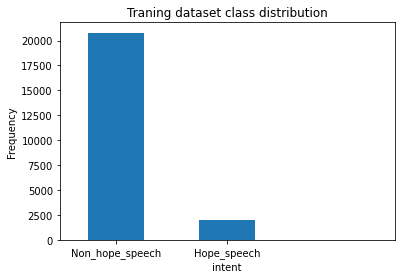

In [ ]:
LABELS = ["Non_hope_speech","Hope_speech"]

count_classes = pd.value_counts(df_train['intent'])
count_classes.plot(kind = 'bar', rot=0)
plt.title("Traning dataset class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("intent")
plt.ylabel("Frequency")

In [ ]:
# converting the strings into integers using Tokenizer 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 



In [ ]:
# instantiating the tokenizer
max_vocab = 20000000
tokenizer = Tokenizer(num_words=max_vocab , lower=None)
tokenizer.fit_on_texts(x_train)

In [ ]:
# checking the word index and find out the vocabulary of the dataset
wordidx = tokenizer.word_index
V = len(wordidx)
print('The size of datatset vocab is: ', V)

The size of datatset vocab is:  24481


In [ ]:
# converting trian and valid sentences into sequences
train_seq = tokenizer.texts_to_sequences(x_train)
valid_seq = tokenizer.texts_to_sequences(x_valid)
print('Training sequence: ', train_seq[0])
print('Validation sequence: ', valid_seq[0])


Training sequence:  [95, 11596, 11597, 1184, 6310, 1742, 5, 62, 81, 12]
Validation sequence:  [1183, 12, 28, 6, 173, 28, 8, 168]


In [ ]:
# padding the sequences to get equal length sequence because its conventional to use same size sequences
# padding the training sequence
pad_train = pad_sequences(train_seq)
T = pad_train.shape[1]
print('The length of training sequence is: ', T)

The length of training sequence is:  197


In [ ]:
# padding the valid sequence
pad_valid = pad_sequences(valid_seq, maxlen=T)
print('The length of testing sequence is: ', pad_valid.shape[1])

The length of testing sequence is:  197


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(pad_train, y_train,train_size=0.7)

In [ ]:
# building the model

from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D


D = 20 
M = 15
model = Sequential()
#i = Input (shape=(T, ))   
model.add(Embedding(V+1, D ,input_length = T))   # V+1 because the indexing of the words in vocab (V) start from 1 not 0
model.add(LSTM(M,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model = Sequential()
# model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
# model.add(SpatialDropout1D(0.4))
# model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(2,activation='softmax'))


# model = Model(i,x)

In [ ]:
# compiling the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
r = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=5)

Epoch 1/5
498/498 [==============================] - 86s 167ms/step - loss: 0.3823 - accuracy: 0.9129 - val_loss: 0.3071 - val_accuracy: 0.9094
Epoch 2/5
498/498 [==============================] - 81s 163ms/step - loss: 0.2905 - accuracy: 0.9160 - val_loss: 0.3089 - val_accuracy: 0.9094
Epoch 3/5
498/498 [==============================] - 83s 167ms/step - loss: 0.2919 - accuracy: 0.9155 - val_loss: 0.3101 - val_accuracy: 0.9094
Epoch 4/5
498/498 [==============================] - 81s 162ms/step - loss: 0.2903 - accuracy: 0.9163 - val_loss: 0.3108 - val_accuracy: 0.9094
Epoch 5/5
498/498 [==============================] - 83s 166ms/step - loss: 0.2956 - accuracy: 0.9141 - val_loss: 0.3106 - val_accuracy: 0.9094


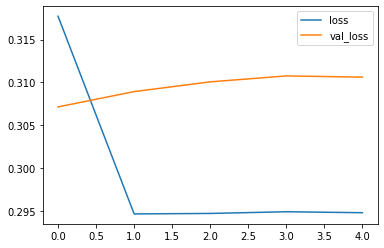

In [ ]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

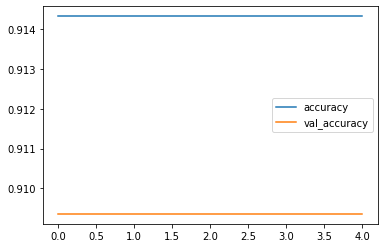

In [ ]:
# plotting the accuracy and validation accuracy of the model
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
